In this part, we want to analyse the data we generated. 

# jupyter notebook basics

the idea behind jupyter is that you create a server on your computer (through typing jupyter notebook in your command line, which you should have already done if you are reading this).

On this server, you can run interactive code. 

You can connect to this server through your browser. If you check the address bar on the top of your browser, you should see localhost:8888/... indicating that your browser is connecting to a location on your own machine. 


# cell types in jupyter notebooks

In jupyter notebooks, you have two different kinds of cells.

The cells that you have looked at so far are called markdown cells.
They support normal text visualisation, highlighting etc. and are useful for descriptions and for taking notes. 

Below, you will see interactive code cells.

You can switch a markdown cell to a code cell by pressing **Esc**, and then by pressing **y**.

Conversely, you can convert a code cell to a markdown cell with the button **m**.

You can create new cells above (**a**) of below (**b**) the currently selected cell. 

# executing code in jupyter notebooks

to run code in a code cell, select the cell and press either of the following

- ctrl + Enter (this runs the code in the current cell)
- shift + Enter (this runs the code in this cell and jumps to the next)

When a cell is executing code, the In \[\]: statement at the margin should change to In \[\*\]

After the cell has finished executing, the star should be replaced with a number.

To stop code execution in a cell that is currently running, select the cell, press **Esc** and then press **ii** (for interrupt). 

Now, for the code, let's import some libraries

# imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# file paths

In [3]:
# these are the files you just generated using the napari interface. 
cy3_spots = '../cy3_spots.pkl'
cy5_spots = '../cy5_spots.pkl'
cell_labels = '../segmentation.pkl'

In [6]:
cells = pd.read_pickle(cell_labels)

In [7]:
cells

,cell_label
0,1
1,2
2,3
3,4
4,5
...,...
215,216
216,217
217,218
218,219


# cy 5 channel

In [10]:
cy5_spots_data = pd.read_pickle(cy5_spots)

In [11]:
#inspect data 
cy5_spots_data.head()

,row,column,cell_id,spot_intensities,nuclear_intensity
0,1334,728,134,8462,23220
1,948,959,84,6560,17283
2,78,1502,5,6522,47569
3,647,791,59,5916,26197
4,1395,1438,141,5811,32817


In [5]:
# plot histograms of spots per cell:

### cy 5 - transcripts per cell 

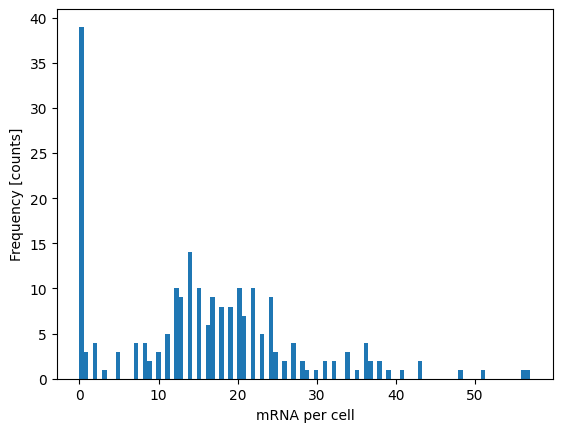

In [25]:
cy5_counts = (cy5_spots_data.groupby('cell_id').apply(lambda x: len(x)).to_frame()
).merge(cells, left_index=True, right_on='cell_label', how='outer').fillna(value=0)

cy5_counts.columns = ['counts','cell_label']

cy5_counts['counts'].plot(kind='hist', bins=100)

plt.xlabel('mRNA per cell')
plt.ylabel('Frequency [counts]')
# adjust bin number to better visualise distribution

plt.savefig('cy5_transcripts_per_cell.png')

### cy5 - mRNAs per transcription site

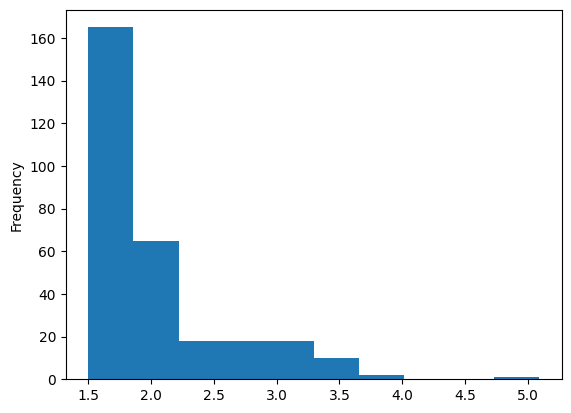

In [26]:
intensities = cy5_spots_data['spot_intensities']
mean_intensity = np.mean(intensities)
transcription_site_threshold = 1.5 * mean_intensity
cy5_spots_data['transcription_site_candidate'] = intensities > transcription_site_threshold

# check the max projection of the DAPI channel for appropriate intensities
# find appropriate values in napari
nuclear_intensity_threshold = 0.8

cy5_spots_data['nuclear_localisation'] = cy5_spots_data['nuclear_intensity'] > nuclear_intensity_threshold
cy5_spots_data['transcription_sites'] = (
    cy5_spots_data['transcription_site_candidate'] & cy5_spots_data['nuclear_localisation'])

(cy5_spots_data[cy5_spots_data['transcription_sites']]['spot_intensities']/mean_intensity).plot(kind='hist')

plt.savefig('cy5_mRNAs_per_transcription_site.png')

# cy 3 channel

In [8]:
cy3_spots_data = pd.read_pickle(cy3_spots)

In [9]:
#inspect data 
cy3_spots_data.head()

,row,column,cell_id,spot_intensities,nuclear_intensity
0,671,801,50,13258,7790
1,877,1065,65,14326,9901
2,1357,517,125,10977,4914
3,742,329,56,10324,7123
4,1343,742,118,10928,11483


### cy 3 - transcripts per cell 

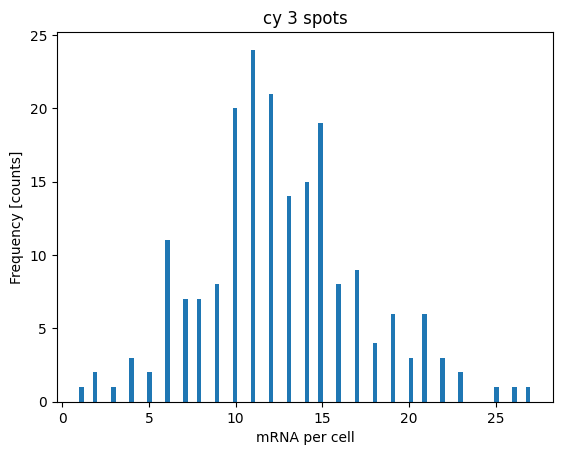

In [10]:
cy3_counts = (cy3_spots_data.groupby('cell_id').apply(lambda x: len(x)).to_frame()
).merge(cells, left_index=True, right_on='cell_label', how='outer').fillna(value=0)

cy3_counts.columns = ['counts','cell_label']

cy3_counts['counts'].plot(kind='hist', bins=100)

plt.xlabel('mRNA per cell')
plt.ylabel('Frequency [counts]')
# adjust bin number to better visualise distribution

plt.savefig('cy3_transcripts_per_cell.png')

### cy3 - mRNAs per transcription site

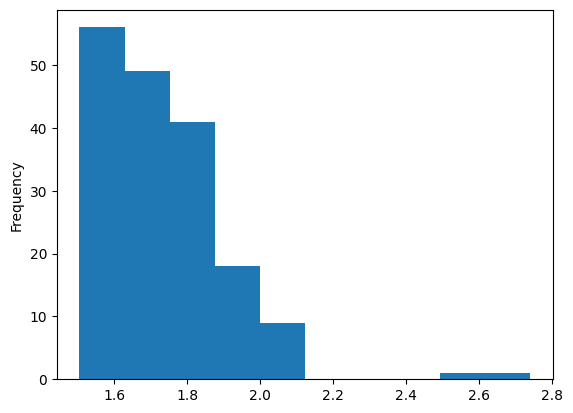

In [11]:
intensities = cy3_spots_data['spot_intensities']
mean_intensity = np.mean(intensities)
transcription_site_threshold = 1.5 * mean_intensity
cy3_spots_data['transcription_site_candidate'] = intensities > transcription_site_threshold

# check the max proejction of the DAPI channel for appropriate intensities
# find appropriate values in napari
nuclear_intensity_threshold = 0.8

cy3_spots_data['nuclear_localisation'] = cy3_spots_data['nuclear_intensity'] > nuclear_intensity_threshold
cy3_spots_data['transcription_sites'] = (
    cy3_spots_data['transcription_site_candidate'] & cy3_spots_data['nuclear_localisation'])

(cy3_spots_data[cy3_spots_data['transcription_sites']]['spot_intensities']/mean_intensity).plot(kind='hist')

plt.savefig('cy3_mRNAs_per_transcription_site.png')